# Credit Card Fraud Detection

Problem
Fraud transactions detection is of significant importance in credit card business. The main requirement is that customers r items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not.


The datasets contains transactions made by credit cards by european cardholders. 
Data Nature: The dataset is highly unbalanced. The positive class (frauds)are approximately 0.1 to 0.2 % of all the transactions.
The original features and data details are not provided because of confidentiality clauses.
It contains only numerical input variables which are the result of a PCA transformation.
The features in the dataset are indicated as  V1, V2, ... V28 are the principal components obtained using Principal Component Analysis technique.
The only features which have not been transformed with PCA are Time and Amount. 
-  Time contains the seconds elapsed between each transaction and the first transaction in the dataset
-  Amount is the transaction Amount
-  The Feature Class is the response.  1 indicates a Fraudulent transaction. 0 indicates a Genuine transaction.

Dataset count: nearly 28,500 credit card transactions

Solution approaches: We evaluated two popular machine learning techniques for this requirement. 
- Isolation Forest Algorithm
- K Means Clustering

Final Observations
- Isolation Forest gives a better accuracy than K Means

References:
Kaggle and open source for dataset and ML techniques use approaches  

## Import necessary packages

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. The Data Set

Dataset is imported from a .csv file as a Pandas DataFrame.  
We present dataset exploration to understand distribution of data using histograms and heatmap. 

In [47]:
df = pd.read_csv('creditcard.csv')

In [48]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.shape

(284807, 31)

In [28]:
#Take a percentage of the data for further calculations since this is a large dataset
df_sample = df.sample(frac = 0.4, random_state = 1)

In [29]:
df_sample.shape

(113923, 31)

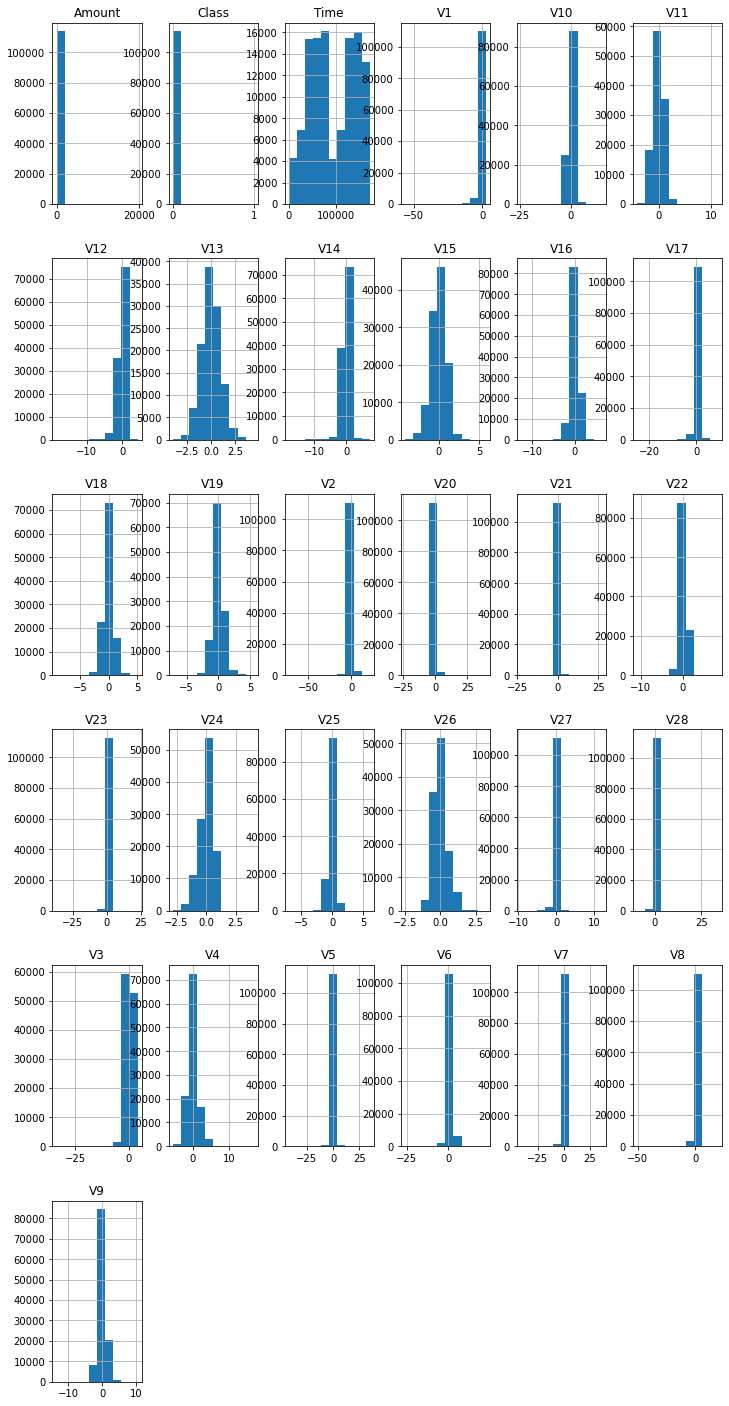

In [30]:
#plot histogram of each parameters
df_sample.hist(figsize = (12, 25))
plt.show()

In [31]:
#Number of Fraud Cases and Valid cases
fraud = df_sample[df_sample['Class']==1]
valid = df_sample[df_sample['Class']==0]

outlier_fraction = len(fraud)/float(len(valid))
outlier_fraction

0.001635351732505693

In [32]:
print("No. of Fraud case : {}".format(len(fraud)))
print("No. of Valid case : {}".format(len(valid)))

No. of Fraud case : 186
No. of Valid case : 113737


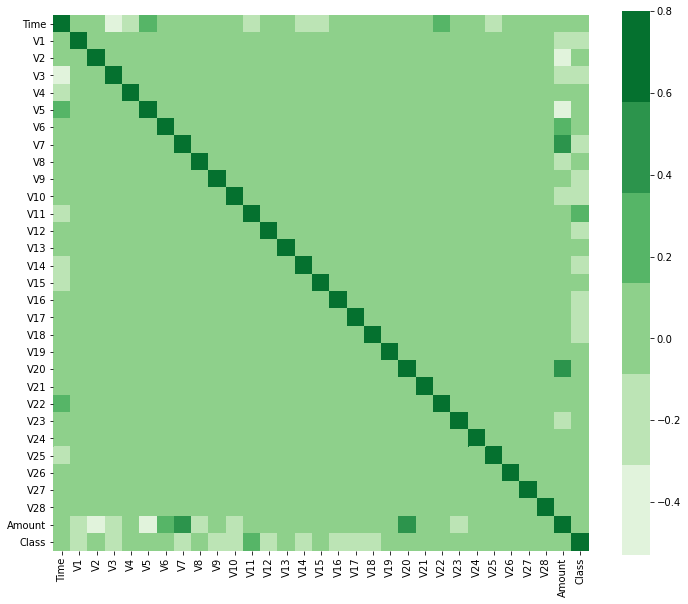

In [33]:
#Heat map for correlation matrix
corrmat = df_sample.corr()
colormap = sns.color_palette("Greens")
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True, cmap=colormap)
plt.show()

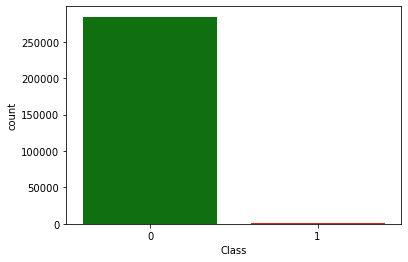

In [34]:
colors = ['#008000', '#FF0000']
sns.countplot(x = 'Class', data = df, palette = colors)

In [35]:
#seperating columns into features and target columns
columns = df_sample.columns.to_list()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'

In [36]:
#Seperating data into features and target data
X = df_sample[columns]
y = df_sample[target]
print(X.shape)
print(y.shape)

(113923, 30)
(113923,)


### 3. Unsupervised Technique - Isolation Forest


In [37]:
# importing outlier detection packages from sklearn
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest


In [38]:
#Building Anomaly Detector Model
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = 1 ),
    #"Local Outlier Factor" : LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction )
}
#fiting the data into different model and predicting the output 
n_outlier = len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #if clf_name == "Local Outlier Factor":
    #    y_pred = clf.fit_predict(X)
    #    scores_pred = clf.negative_outlier_factor_
    #else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()
print('Accuracy Score : {}'.format(accuracy_score(y, y_pred)))
print((classification_report(y, y_pred)))

Accuracy Score : 0.9976738674367774
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.29      0.29      0.29       186

    accuracy                           1.00    113923
   macro avg       0.64      0.64      0.64    113923
weighted avg       1.00      1.00      1.00    113923



In [39]:
import numpy as np
import sklearn as sk
import pandas as pd

In [40]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [42]:
X = df.iloc[:,:-1]
y = df['Class']

X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=500)

In [43]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=2)

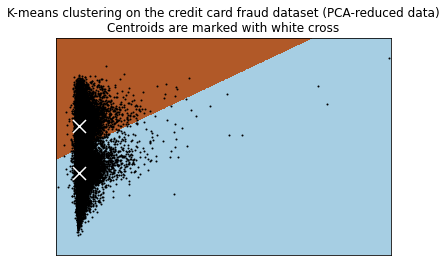

In [44]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [45]:
predictions = kmeans.predict(X_test)

pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y_test == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0)[0]
real_good = np.where(y_test == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X_test) - (false_neg + false_pos)) / len(X_test)
print("Accuracy:", accuracy)
print("False negative rate (with respect to misclassifications): ", false_neg_rate)
print("False negative rate (with respect to all the data): ", false_neg / len(predictions))
print("False negatives, false positives, mispredictions:", false_neg, false_pos, false_neg + false_pos)
print("Total test data points:", len(X_test))

Accuracy: 0.5478736420994392
False negative rate (with respect to misclassifications):  0.0026121334776674355
False negative rate (with respect to all the data):  0.0011810143956079032
False negatives, false positives, mispredictions: 111 42383 42494
Total test data points: 93987
